In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.optimize import curve_fit
from scipy import odr
import glob
import os

In [51]:
#Just pulling the distance data from the files for Deionised Water at varying temperatures

value25 = open('Deion25.txt','r')
value31 = open('Deion31.txt','r')
value35 = open('Deion35.txt','r')
value40 = open('Deion40.txt','r')
value45 = open('Deion45.txt','r')
value50 = open('Deion50.txt','r')
value55 = open('Deion55.txt','r')

values25 = value25.readlines()
values31 = value31.readlines()
values35 = value35.readlines()
values40 = value40.readlines()
values45 = value45.readlines()
values50 = value50.readlines()
values55 = value55.readlines()

Hz = 0
cm = 1
arr25 = []
arr31 = []
arr35 = []
arr40 = []
arr45 = []
arr50 = []
arr55 = []


for x in values25:
    arr25.append(x.split()[cm])
    
for x in values31:
    arr31.append(x.split()[cm])
    
for x in values35:
    arr35.append(x.split()[cm])
    
for x in values40:
    arr40.append(x.split()[cm])
    
for x in values45:
    arr45.append(x.split()[cm])
    
for x in values50:
    arr50.append(x.split()[cm])
    
for x in values55:
    arr55.append(x.split()[cm])

In [52]:
#Just pulling the frequency data from the files for Deionised Water at varying temperatures
Freq25 = []
Freq31 = []
Freq35 = []
Freq40 = []
Freq45 = []
Freq50 = []
Freq55 = []


for x in values25:
    Freq25.append(x.split()[Hz])
    
for x in values31:
    Freq31.append(x.split()[Hz])
    
for x in values35:
    Freq35.append(x.split()[Hz])
    
for x in values40:
    Freq40.append(x.split()[Hz])
    
for x in values45:
    Freq45.append(x.split()[Hz])
    
for x in values50:
    Freq50.append(x.split()[Hz])
    
for x in values55:
    Freq55.append(x.split()[Hz])

print(Freq25)
print(Freq31)
print(Freq35)
print(Freq40)
print(Freq45)
print(Freq50)
print(Freq55)

print(arr25)
print(arr31)
print(arr35)
print(arr40)
print(arr45)
print(arr50)
print(arr55)


['160', '180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['160', '180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['160', '180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['160', '180', '200', '220', '240', '260', '280', '300']
['0.023', '0.0265', '0.028', '0.0305', '0.032', '0.034', '0.036', '0.0365', '0.0385', '0.04', '0.042', '0.0435', '0.045']
['0.0223', '0.0245', '0.0265', '0.028', '0.03', '0.0315', '0.033', '0.0345', '0.0365', '0.0385', '0.0395', '0.041', '0.0415']
['0.023', '0.024', '0.0275', '0.029', '0.0305', '0.0325', '0.034', '0.0345', '0.0365', '0.0385', '0.04', '0.0415', '0.0425']
['0.025', '0.027', '0.0275', '0.0285', '0.0315

In [53]:
#Coverting to arrays by hand as the data is only imported as a string so to use variables it must be stored differently

X1 = [0.023,0.0265,0.028,0.0305,0.032,0.034,0.036,0.0365,0.0385,0.04,0.042,0.0435,0.045]
X2 = [0.0223,0.0245,0.0265,0.028,0.03,0.0315,0.033,0.0345,0.0365,0.0385,0.0395,0.041,0.0415]
X3 = [0.023,0.024,0.0275,0.029,0.0305,0.0325,0.034,0.0345,0.0365,0.0385,0.04,0.0415,0.0425]
X4 = [0.025,0.027,0.0275,0.0285,0.0315,0.032,0.0345,0.0355,0.0365,0.039,0.0395]
X5 = [0.0235,0.0245,0.0265,0.029,0.03,0.031,0.0335,0.0345,0.0365,0.037,0.039,0.0405]
X6 = [0.024,0.0245,0.027,0.028,0.0305,0.0315,0.0335,0.0355,0.0365,0.038,0.0405,0.0405]
X7 = [2.6,2.8,2.95,3.1,3.35,3.65,3.75,3.85]

In [54]:
hz25 = np.arange(160,420,20)
hz31 = np.arange(160,420,20)
hz35 = np.arange(160,420,20)
hz40 = np.arange(200,420,20)
hz45 = np.arange(180,420,20)
hz50 = np.arange(180,420,20)
hz55 = np.arange(160,320,20)

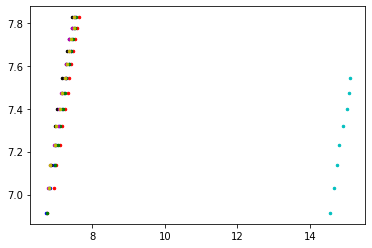

In [55]:
sols = [25,31,35,40,45,50,55]
Hz = [hz25,hz31,hz35,hz40,hz45,hz50,hz55]
X = [X1,X2,X3,X4,X5,X6,X7]
sols = [25,31,35,40,45,50,55]
dens = [998,998,998,998,998,998,998]
cols = ['r','b','g','k','m','y','c']

for Hz, X, sols,c,p in zip(Hz, X, sols, cols,dens):
    laz = 632.8e-9
    x = 0.04
    y = 0.515
    theta = np.arcsin( x / np.sqrt((x**2)+(y**2)) )
    l = 5.15
    x1 = 1*np.tan(theta)
    k = []
    for i in X:
        h = x1 + i 
        j = 2*i
        m = (np.pi*h*j)/(laz*((h**2)+l**2))
        k.append(m)
    lnk = np.log(k)
    w = 2*np.pi*Hz
    lnw = np.log(w)
    
    xerr = yerr = 0.0005
    dfdx =  y / ((x**2)+(y**2))
    dfdy = -x / ((x**2) + (y**2))
    theterr = np.sqrt( (dfdx**2)*(xerr**2) + (dfdy**2)*(yerr**2) )
    
    Xx1 = l*np.tan(theta)
    lerr = 0.0005
    dfdl = np.tan(theta)
    dfdt = 1 / (np.cos(theta)**2)
    Xerr = np.sqrt ( (dfdl**2)*(lerr**2) + (dfdt**2)*(theterr**2))
    
    lnkerr = []
    dfdh = - ( (h**2)-(l**2) ) / ( (h**3) + h*(l**2) )
    dfdl = - ( (2*l) / ( (h**2) + (l**2)) )
    
    for i in X:
        d = 2*i
        derr = 0.0005
        h = Xx1 + d/2
        dhdx = 1
        dhdd = 1/2
        herr = np.sqrt( (dhdx**2)*(Xerr**2) + (dhdd**2)*(derr**2))
        dfdd = 1/d
        lnkerrv = np.sqrt( (dfdh**2)*(herr**2) + (dfdd**2)*(derr**2) + (dfdl**2)*(lerr**2))
        lnkerr.append(lnkerrv)
        
    lnwerr = []
    for i in Hz:
        lnwerrv = np.sqrt( ((1/i)**2)*((0.5)**2) )
        lnwerr.append(lnwerrv)
        
    plt.errorbar(lnk,lnw,lnwerr,lnkerr, '.', markersize = 5, linewidth = 1, color = c, label = str(sols))

Surface Tension of water at 25 C is 56.64163808768386 +- 21.659620512674124 mN/M
Surface Tension of water at 31 C is 57.72630452535989 +- 15.085763953483626 mN/M
Surface Tension of water at 35 C is 41.559933528920794 +- 17.816192538758234 mN/M
Surface Tension of water at 40 C is 66.00141793480581 +- 47.56288949898338 mN/M
Surface Tension of water at 45 C is 76.85280320835668 +- 31.656456910524167 mN/M
Surface Tension of water at 50 C is 121.91238964467354 +- 60.39752408711784 mN/M


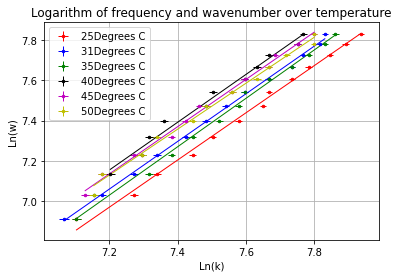

In [56]:
sols = [25,31,35,40,45,50]
hzs = [hz25,hz31,hz35,hz40,hz45,hz50]
X = [X1,X2,X3,X4,X5,X6]
#temperature of solutions
sols = [25,31,35,40,45,50]
#density of water
dens = [998,998,998,998,998,998]
#colours used to plot the varying solutions
cols = ['r','b','g','k','m','y','c']
#plt.figure(figsize = (15,8))
plt.grid()

for hzs, X, sols,c,p in zip(hzs, X, sols, cols,dens):
    #Laser wavelength, distance of the 0th order image above water, and the distance between the screen and laser
    laz = 632.8e-9
    x = 0.0492
    y = 0.4838
    theta = np.arcsin( x / np.sqrt( (x**2)+(y**2))  )
    l = 4.838
    x1 = 1*np.tan(theta)
    k = []
    for i in X:
        h = x1 + i 
        j = 2*i
        m = ( np.pi*h*j ) / ( laz*((h**2)+l**2) )
        k.append(m)
    #logs of the values for the lnk lnw relation
    lnk = np.log(k)
    w = 2 * hzs * np.pi
    lnw = np.log(w)
    
    #all code below follows a propogation of errors following pm the smallest decimal of each data point i.e 0.0005
    xerr = yerr = 0.0005
    dfdx =  y / ( (x**2) + (y**2) )
    dfdy = -x / ( (x**2) + (y**2) )
    theterr = np.sqrt( (dfdx**2) * (xerr**2) + (dfdy**2) * (yerr**2) )
    
    Xx1 = l*np.tan(theta)
    lerr = 0.0005
    dfdl = np.tan(theta)
    dfdt = 1 / (np.cos(theta)**2)
    Xerr = np.sqrt ( (dfdl**2) * (lerr**2) + (dfdt**2) * (theterr**2) )
    
    lnkerr = []
    dfdl = - ( (2*l) / ( (h**2) + (l**2)) )
    dfdh = - ( (h**2) - (l**2) ) / ( (h**3) + h*(l**2) )
    
    for i in X:
        d = 2*i
        derr = 0.0005
        h = Xx1 + d/2
        dhdx = 1
        dhdd = 1/2
        herr = np.sqrt( (dhdx**2) * (Xerr**2) + (dhdd**2) * (derr**2) )
        dfdd = 1/d
        
        lnkerrv = np.sqrt( (dfdh**2) * (herr**2) + (dfdd**2) * (derr**2) + (dfdl**2) * (lerr**2) )
        lnkerr.append(lnkerrv)
        
    lnwerr = []
    for i in hzs:
        lnwerrv = np.sqrt( ( (1/i)**2) * ( (0.5)**2) )
        lnwerr.append(lnwerrv)
    
    #Errors of lnk and lnw   
    plt.errorbar(lnk, lnw, lnwerr, lnkerr, '.', markersize = 5, linewidth = 1, color = c, label = str(sols)+"Degrees C" )
    plt.legend()
    
    def func(p, x):
        m, c = p
        return m*x + c 
    
    data = odr.RealData( lnk, lnw, sx = lnkerr, sy = lnwerr)
    lin = odr.Model(func)
    odr1 = odr.ODR(data, lin, beta0 = [1.5, -5])
    out = odr1.run()
    
    errsurf = np.sqrt(((2*p*np.exp( 2*( out.beta[1]) ) )**2) * ( (out.sd_beta[1])**2) )
    
    y = out.beta[0] * lnk + out.beta[1]
    plt.plot(lnk,y,linewidth=1,color=c)
    plt.title('Logarithm of frequency and wavenumber over temperature')
    plt.xlabel('Ln(k)')
    plt.ylabel('Ln(w)')
    
    
    
    surf = p*np.exp(2*out.beta[1])
    print('Surface Tension of water at', str(sols), 'C is',surf,'+-',errsurf, 'mN/M')
    
plt.savefig('Surface tension temps')

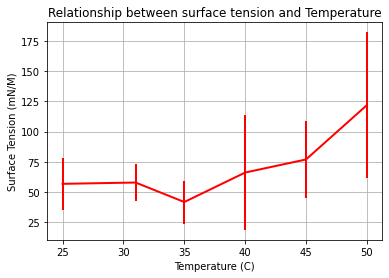

In [57]:
surface = [56.64163808768386 ,57.72630452535989 ,41.559933528920794 ,66.00141793480581 ,76.85280320835668 ,121.91238964467354 ]
surfacerr = [21.659620512674124 ,15.085763953483626 ,17.816192538758234 ,47.56288949898338 ,31.656456910524167 ,60.39752408711784 ]
sols = [25,31,35,40,45,50]

#plt.figure(figsize = (15,8))
plt.grid()
plt.errorbar(sols, surface, surfacerr, markersize = 5, linewidth = 2, color= 'r')
plt.title('Relationship between surface tension and Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Surface Tension (mN/M)')
plt.savefig('surfaceTemp')